### Função cut

Utilizamos a função cut quando desejamos categorizar intervalos de dados de um dataset. No exemplo abaixo vamos utilizar o dataset da IBM e dividir os funcionários em intervalos de idades (conforme feito no arquivo 28-histogramas) e com os dados divididos em diferentes intervalos de idades vamos categoriza-los.


https://pandas.pydata.org/docs/reference/api/pandas.cut.html

### Preparativos do Dataset (remoção de colunas sem variação de valores e categorizando as colunas ordenadas e não ordenadas)

In [1]:
import pandas as pd

BASE = "../datasets/HR-Employee-Attrition.csv"

df = pd.read_csv(BASE)


# Limpando a base de colunas com valores não variam e removendo a
# coluna de identificação (EmployeeNumber)

df = df.drop("EmployeeNumber", axis=1)

for c in df.columns:
    column = df[c]
    if (column.nunique() <= 1):
        print(f"Removendo coluna {c}") 
        df = df.drop(c, axis=1)


# Separando nossas colunas por variáveis categóricas ordenadas e 
# não ordernadas


# Colunas que são categóricas e não ordenadas
columns_categorical_not_ordered = [
    'BusinessTravel',
    'Department',
    'EducationField',
    'Gender',
    'JobRole',
    'MaritalStatus',
    'OverTime'
]

# Colunas que são categóricas e ordernadas
columns_categorical_ordered = [
    'Education',
    'EnvironmentSatisfaction',
    'JobSatisfaction',
    'JobInvolvement',
    'JobLevel',
    'PerformanceRating',
    'RelationshipSatisfaction',
    'StockOptionLevel',
    'WorkLifeBalance',
    'JobInvolvement'
]

target_column = ['Attrition']


numeric_columns = [
    column
    for column in df.columns
    if column not in (columns_categorical_ordered + columns_categorical_not_ordered + target_column)
]


# Convertendo nossas colunas não ordernadas para o tipo category
### Preparativos do Dataset (remoção de colunas sem variação de valores e categorizando as colunas ordenadas e não ordenadas)
for column in columns_categorical_not_ordered:
    df[column] = df[column].astype("category")

Removendo coluna EmployeeCount
Removendo coluna Over18
Removendo coluna StandardHours


### Criação de categorias com base na idade utilizando a função cut

In [32]:
# Definindo os intervalos de idade e seus respectivos rótulos

age_groups = [0, 20, 30, 50, float("inf")] #leia-se (0-20], (20-30], (30-50], (50-inf]
labels = ["Adolescent", "Young adult", "Mature adult", "Senior adult"]

# Adicionando nova coluna categórica no DataFrame seguindo os rótulos definidos acima  

df["AgeGroup"] = pd.cut(df["Age"], bins=age_groups, labels=labels)

In [10]:
# AgeGroup foi adicionada como uma coluna categórica

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   object  
 2   BusinessTravel            1470 non-null   category
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   category
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   int64   
 7   EducationField            1470 non-null   category
 8   EnvironmentSatisfaction   1470 non-null   int64   
 9   Gender                    1470 non-null   category
 10  HourlyRate                1470 non-null   int64   
 11  JobInvolvement            1470 non-null   int64   
 12  JobLevel                  1470 non-null   int64   
 13  JobRole                   1470 non-null   catego

In [15]:
#  Podemos visualizar os detalhes das coluans categóricas e verificar que 
#"AgeGroup" foi adicionada como uma coluna categórica ordenada

for column in df.select_dtypes(include="category"):
    print(column)
    print(f"{column}.cat.categories: {df[column].cat.categories}")
    print(f"{column}.cat.ordered: {df[column].cat.ordered}")
    print(f"{column}.cat.codes: {df[column].cat.codes.unique()}")
    print()

BusinessTravel
BusinessTravel.cat.categories: Index(['Non-Travel', 'Travel_Frequently', 'Travel_Rarely'], dtype='object')
BusinessTravel.cat.ordered: False
BusinessTravel.cat.codes: [2 1 0]

Department
Department.cat.categories: Index(['Human Resources', 'Research & Development', 'Sales'], dtype='object')
Department.cat.ordered: False
Department.cat.codes: [2 1 0]

EducationField
EducationField.cat.categories: Index(['Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other',
       'Technical Degree'],
      dtype='object')
EducationField.cat.ordered: False
EducationField.cat.codes: [1 4 3 2 5 0]

Gender
Gender.cat.categories: Index(['Female', 'Male'], dtype='object')
Gender.cat.ordered: False
Gender.cat.codes: [0 1]

JobRole
JobRole.cat.categories: Index(['Healthcare Representative', 'Human Resources', 'Laboratory Technician',
       'Manager', 'Manufacturing Director', 'Research Director',
       'Research Scientist', 'Sales Executive', 'Sales Representative'],
      dtype=

### As vantagens que temos em determinar colunas como categóricas ordenadas (quando de fato são)

Além de performance (pois o tipo object por ser mais genérico exige mais processamento) ganhamos também algumas facilidades para visualizar as informações do nossos valores categóricos

In [18]:
df["AgeGroup"].value_counts().sort_index()

AgeGroup
Adolescent       28
Young adult     358
Mature adult    941
Senior adult    143
Name: count, dtype: int64

Repare que no código acima o Pandas nos devolveu os resultados entendendo que há uma hierarquia entre os dados, ao contrário do que seria retornado em uma coluna não categórica onde não há qualquer relação entre as classes então o critério de organização do Pandas é nos devolver os dados em ordem alfabética.

#### Explorando visualmente nossa coluna

É importante entendermos que histogramas são termos que não são compreendidos por um público fora do contexto mais técnico, em alguns casos vale separamos nossos dados em grupos (como fizemos com o cut) e apresentarmos a concentração de dados em determinadas categorias através do gráfico de barras ou tabelas com o crosstab. 

<Axes: xlabel='AgeGroup'>

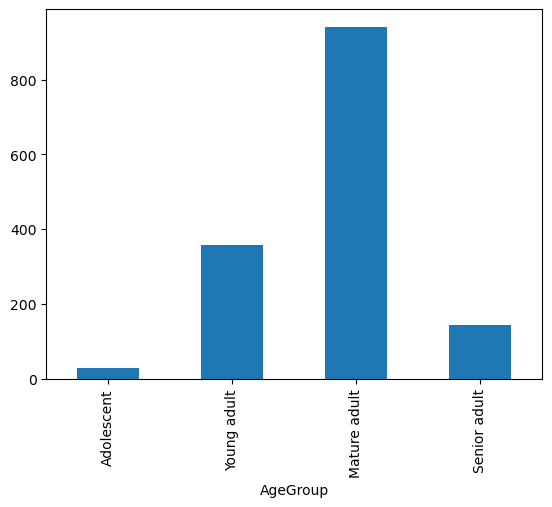

In [22]:
df["AgeGroup"].value_counts().sort_index().plot.bar()

In [31]:
pd.crosstab(df["AgeGroup"], df["Attrition"], normalize="index").mul(100).round(2)

Attrition,No,Yes
AgeGroup,,
Adolescent,42.86,57.14
Young adult,76.54,23.46
Mature adult,87.35,12.65
Senior adult,87.41,12.59
